# Procrustes Clustering - MNIST Digits

We perform experiments on the MNIST handwritten digits dataset.
Below, for each class, we choose a number $N$ of elements at random. We cluster the data with K-means algorithm using Euclidean distance on the original data (vector with $28 \times 28$ components), and also using Procrustes distance on a set of landmark points extracted from the image.

In [1]:
from wand.image import Image as WImage
from IPython.display import Image

In the following we repeat the same experiments as ["Learning Transformations for Clustering Classification", Q. Qiu and G. Sapiro, Journal of Machine Learning Research (2015)](http://www.jmlr.org/papers/volume16/qiu15a/qiu15a.pdf). They learn a low-rank transformation for subspace clustering. They claim to beat state of the art such as Vidal's paper.

We first show a figure of how Procrustes is aligning them. We consider the following distances:

$$
\begin{align}
d_E &= \mbox{Euclidean on landmark points/original data} \\
d_{P_0} &= \mbox{Procrustes on external contour only} \\
d_{P_3} &= \mbox{Procrustes on external contour but restore internal contours} \\
d_{P} &= \mbox{Standard Procrustes on all contours} \\
d_{P_l} &= \mbox{Standard Procrustes from scipy library}
\end{align}
$$

What we learn from the figures below is that Procrustes gives a good distance when the shapes have only one contour. For multiple contours, and when comparing shapes with different topologies, Procrustes seems to do worst than pure Euclidean distance on the original image. Notice that the original images are already aligned and centered, and also it contains intensities for different pixels. In Procrustes, we are just considering a set of landmark points extracted from the original image and we discard the intensities, thus we are actually using less information than contained in the original image.

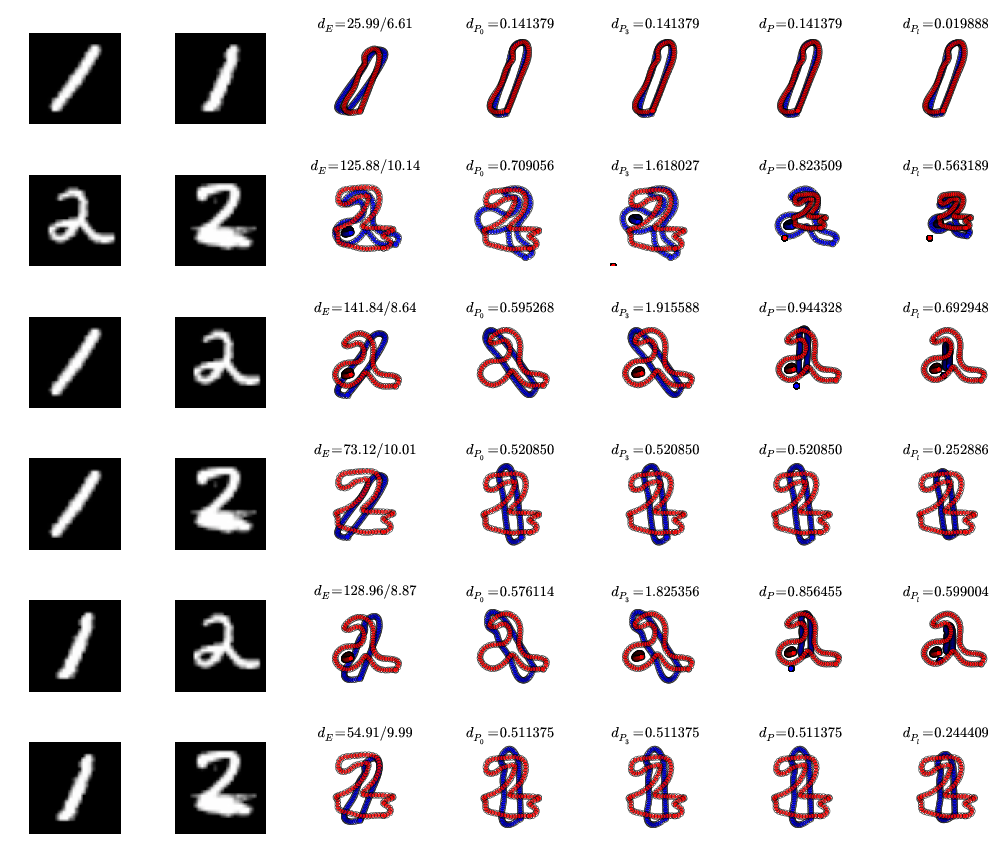

In [3]:
WImage(filename="../figs/alignment_12.pdf")

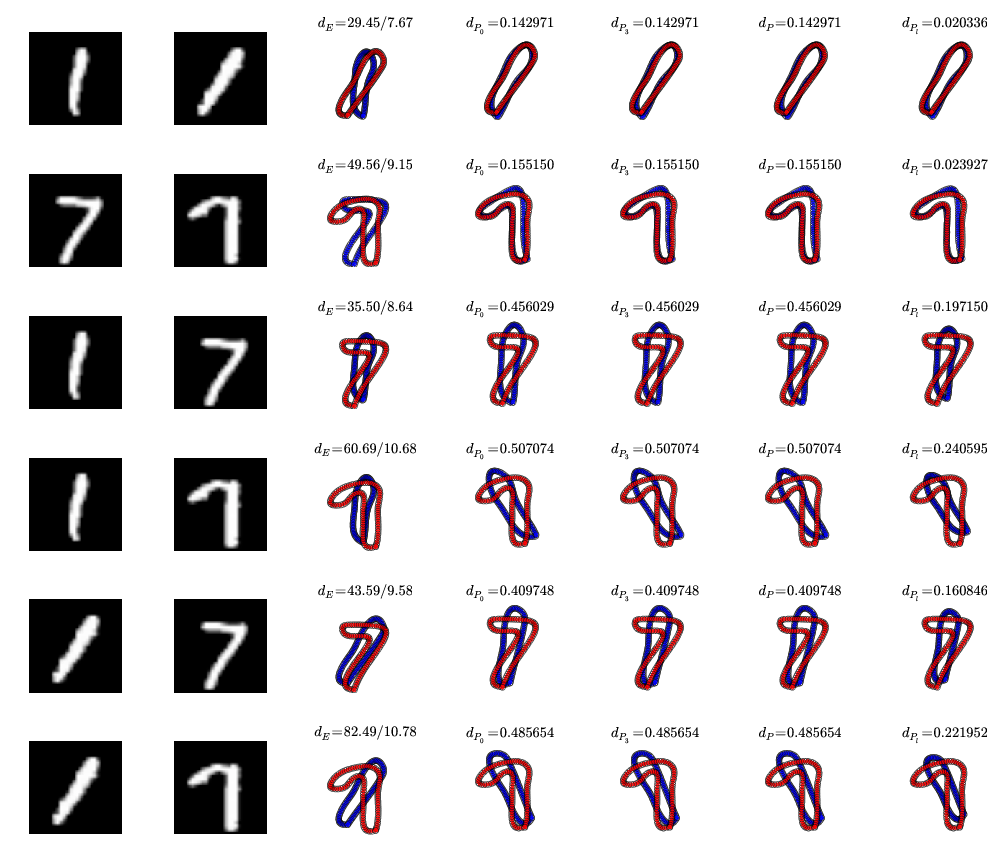

In [4]:
WImage(filename="../figs/alignment_17.pdf")

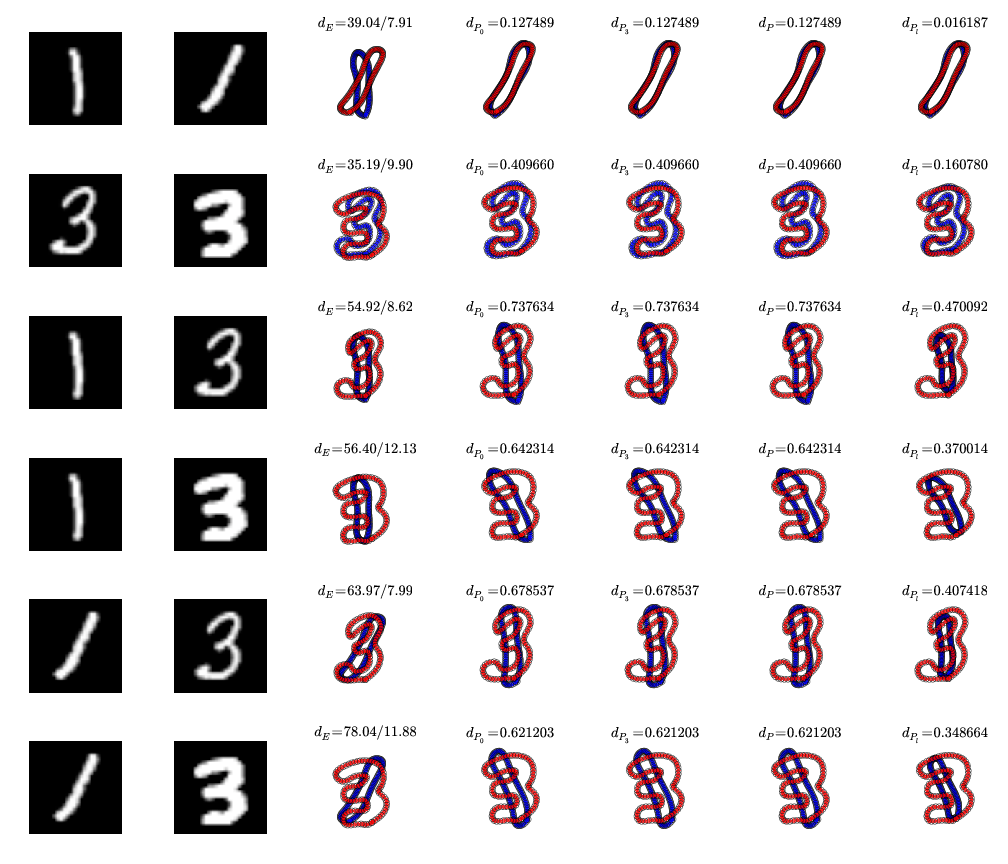

In [8]:
WImage(filename="../figs/alignment_13.pdf")

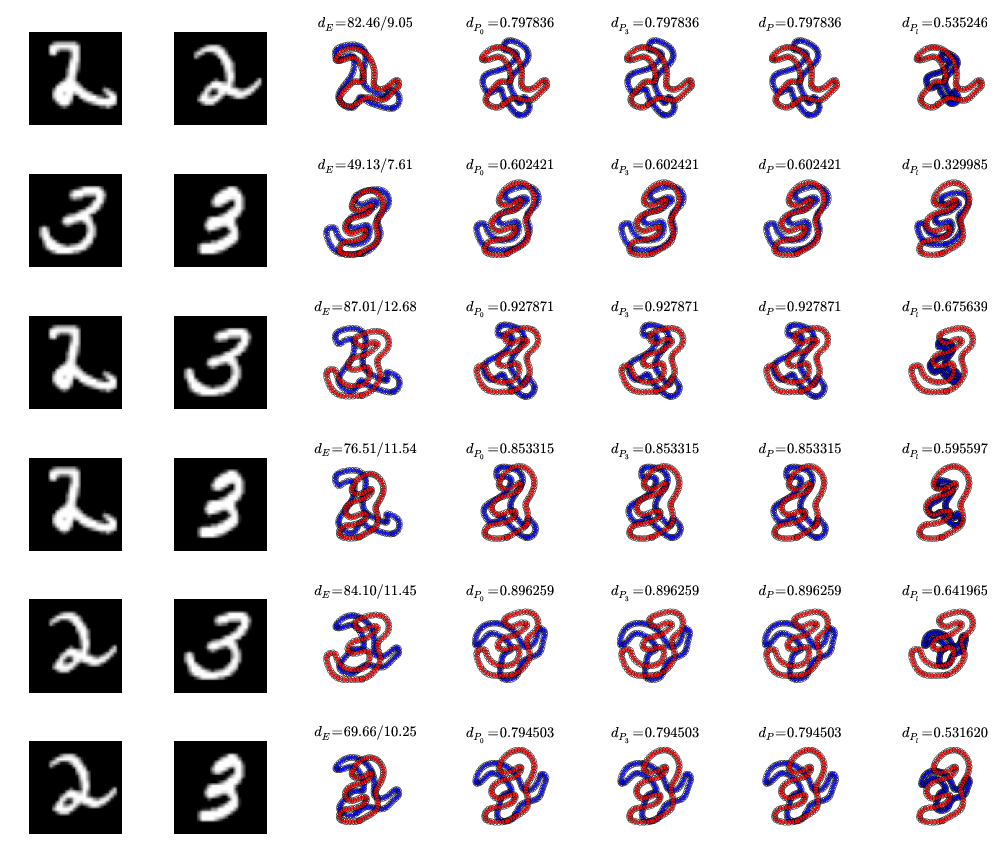

In [9]:
WImage(filename="../figs/alignment_23.pdf")

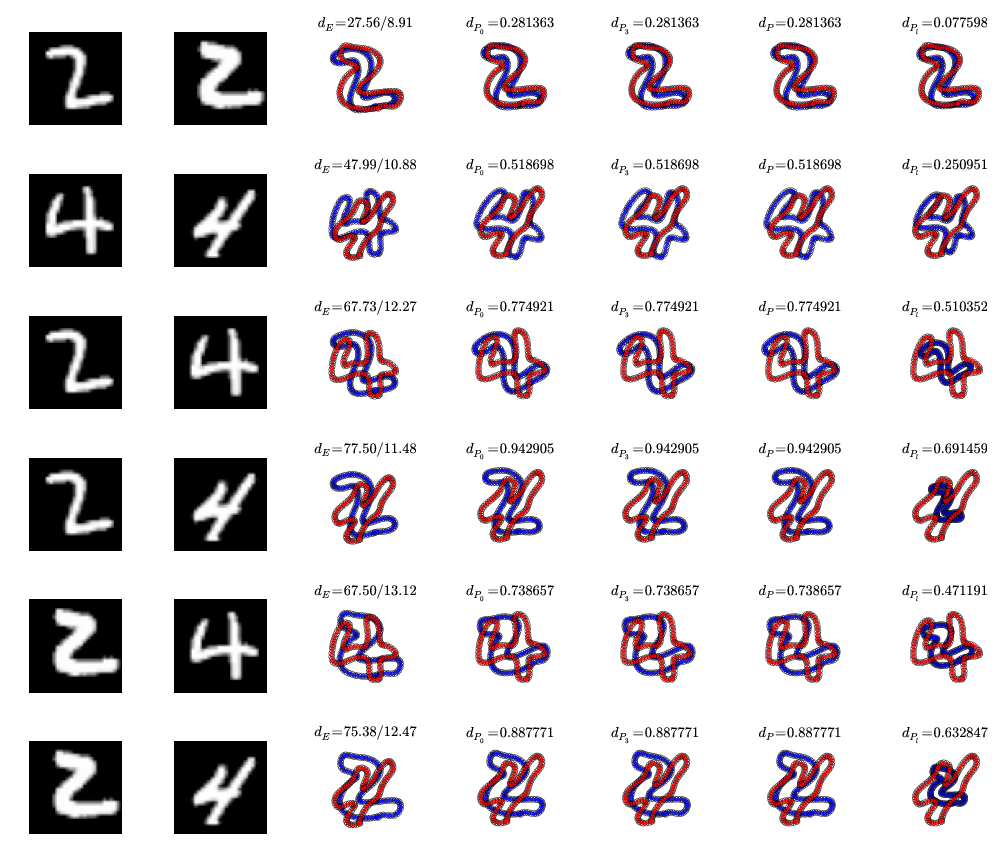

In [10]:
WImage(filename="../figs/alignment_24.pdf")

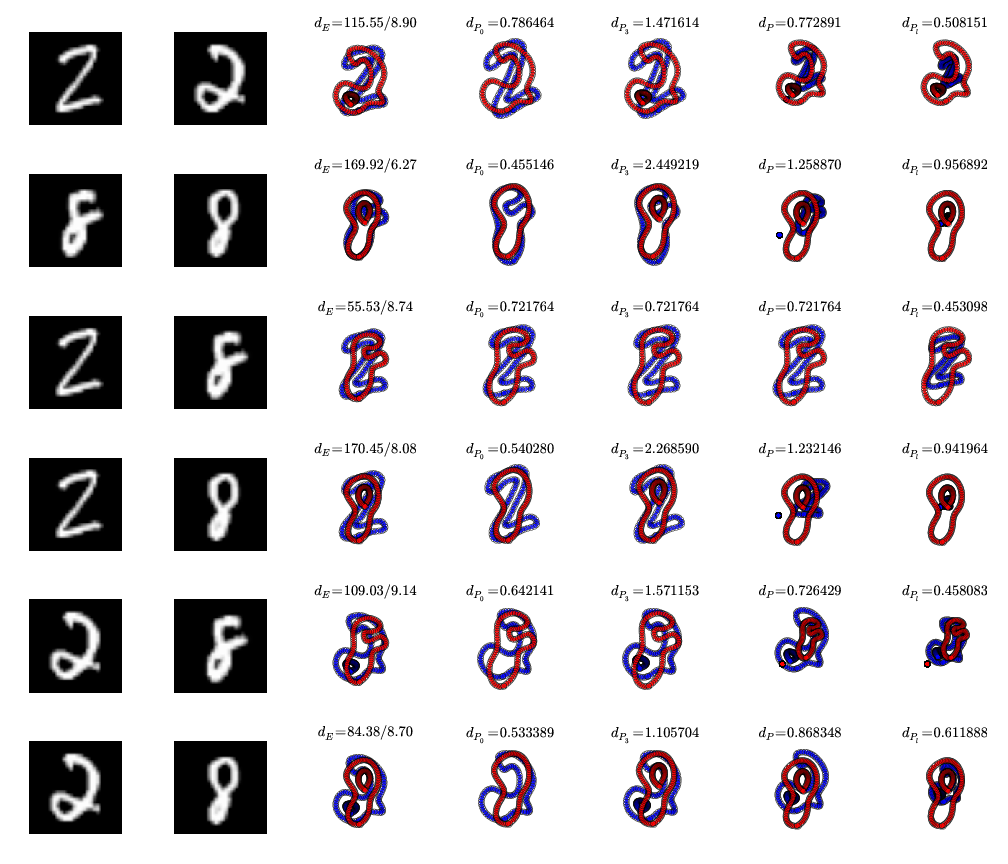

In [11]:
WImage(filename="../figs/alignment_28.pdf")

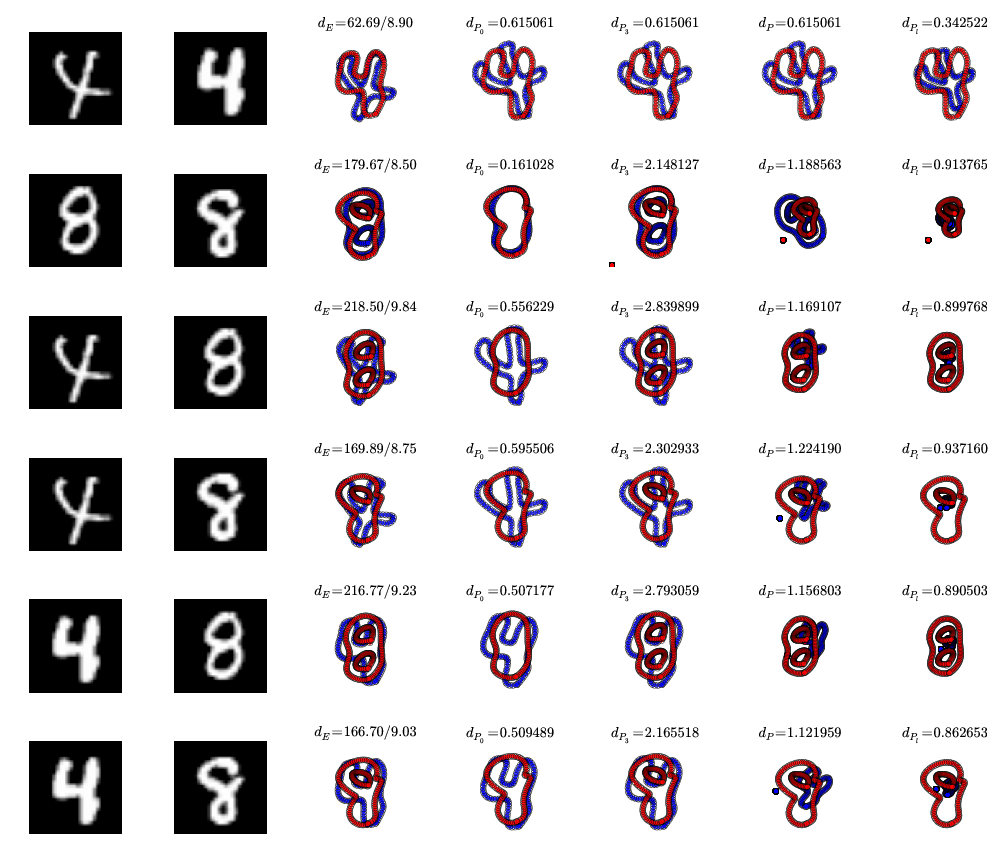

In [12]:
WImage(filename="../figs/alignment_48.pdf")

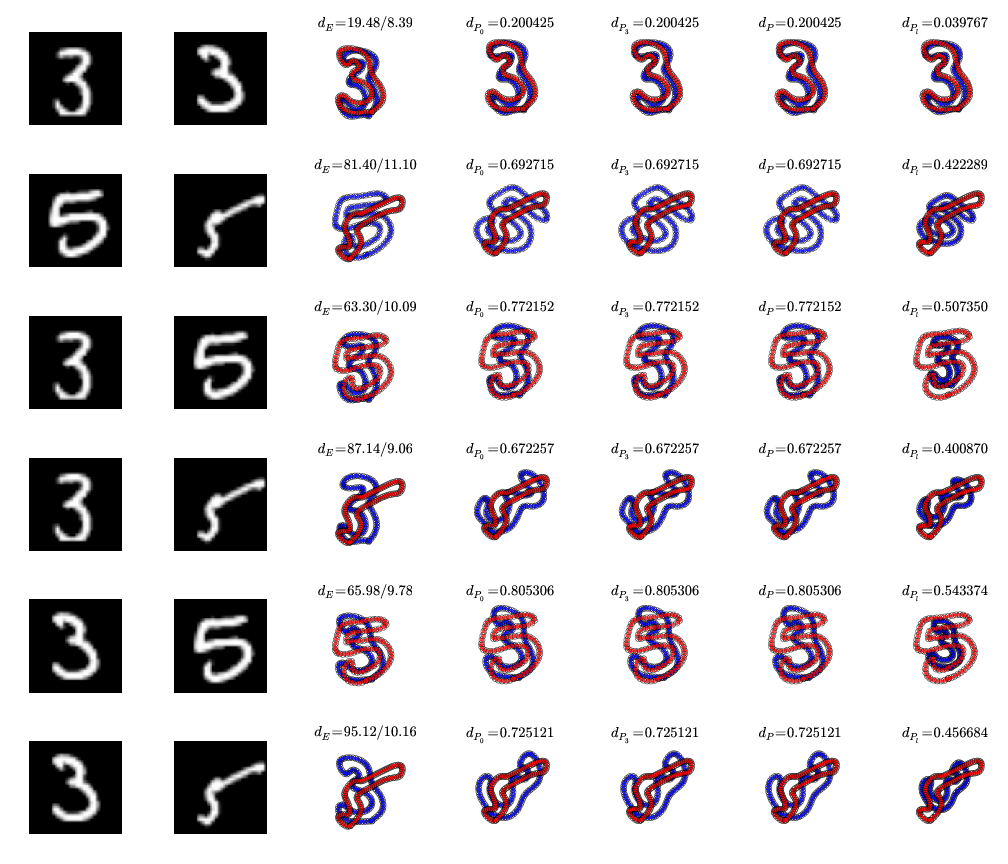

In [13]:
WImage(filename="../figs/alignment_35.pdf")

Now we select the same number of $N_i$ points for each class, and cluster them using $K$-means. We change the distance in $K$-means according to the above description. Let $\hat{z}_i \in \mathbb{R}^n$ such that
$$
(\hat{z}_i)_j = \begin{cases} 1 & \mbox{if $x_i \in C_j$} \\ 0 & \mbox{otherwise}\end{cases}
$$
We then form the matrix $\hat{Q}_{ij} = (z_i)_j$. We define an analogous matrix $Q$ for the true labels $z$.
Then the accuracy is given by
$$
A = \mbox{max} \, \dfrac{1}{N} \sum_{i=1}^{N}\sum_{j=1}^K \hat{Q}_{i \pi(j)} Q_{ij}
$$
where $\pi(j)$ is a permutation of the columns for row $i$. This can be solved in $O(N^3)$, which is the *assignment problem*. We plot $A$ versus $N_i$ below.

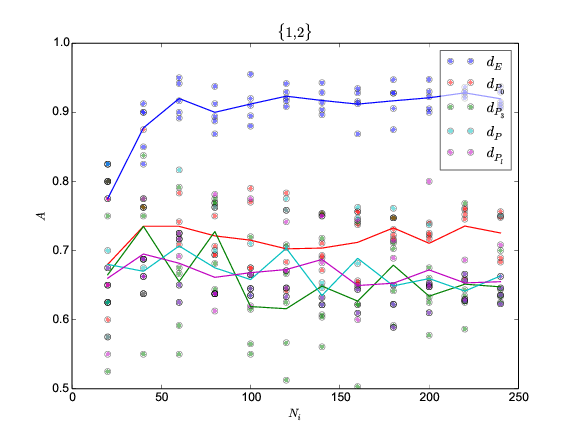

In [14]:
WImage(filename="../figs/clustering_12.pdf")

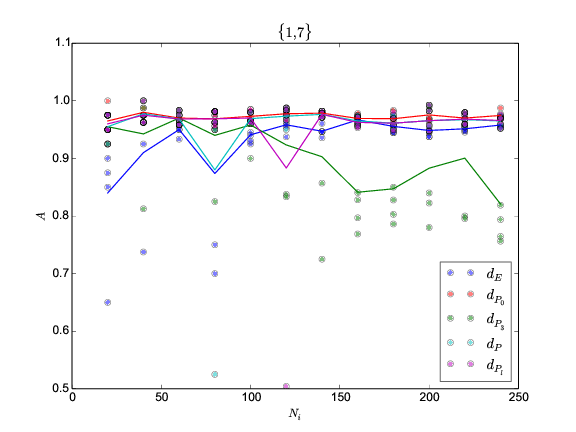

In [15]:
WImage(filename="../figs/clustering_17.pdf")

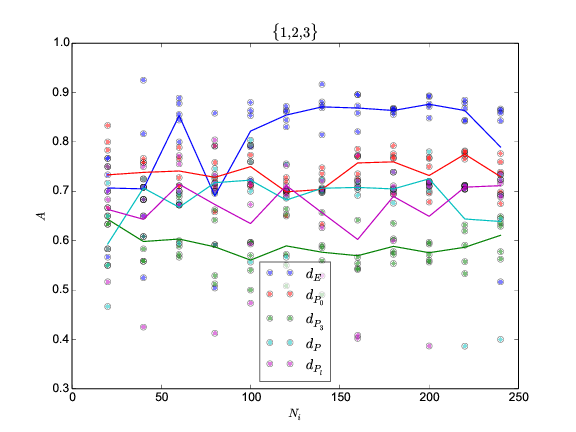

In [16]:
WImage(filename="../figs/clustering_123.pdf")

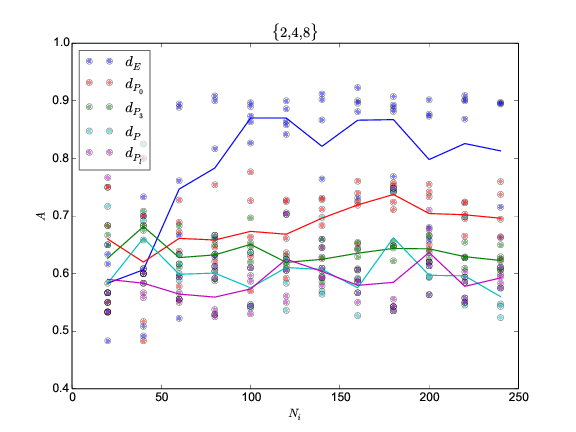

In [17]:
WImage(filename="../figs/clustering_248.pdf")

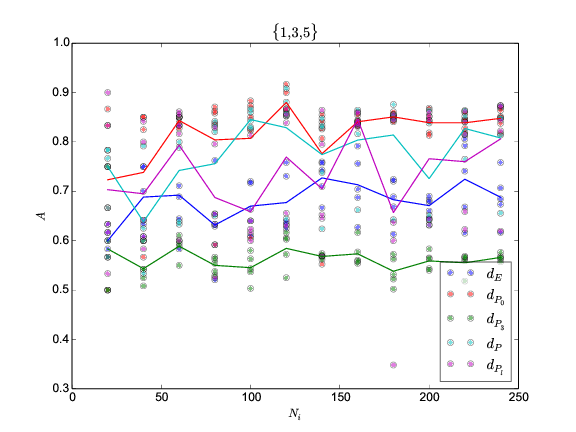

In [19]:
WImage(filename="../figs/clustering_135.pdf")

Now we repeat the experiments shown in pp. 203-206.

$$
\begin{array}{lllll|lllll}
\mbox{Classes} & \mbox{SSC} & \mbox{LBF} & \mbox{LSA} & \mbox{SSC2} & \mbox{Eucl} & \mbox{Proc}_0 & \mbox{Proc}_3 & \mbox{Proc} & \mbox{Proc}_l \\
\hline
\{1,2\}& 0.959716 & 0.907583 & 0.909953 & 0.985782 & 0.918750 & 0.719167 & 0.647500 & 0.630417  & 0.630417  \\
\{1,7\}& 0.979167 & 0.835648 & 0.976852 & 0.995370 & 0.952500 & 0.970417 & 0.911667 & 0.963333 & 0.963750
\end{array}
$$

$$
\begin{array}{llll|lllll}
\mbox{Classes} & \mbox{LBF} & \mbox{LSA} & \mbox{R-LBF} & \mbox{Eucl} & \mbox{Proc}_0 & \mbox{Proc}_3 & \mbox{Proc} & \mbox{Proc}_l \\
\hline
\{1,2,3\}& 0.690096 & 0.698083 & 0.904153 &  0.826667 &  0.688056 & 0.585556 & 0.715833 & 0.651944  \\
\{2,4,8\}& 0.649063 & 0.787053 & 0.930153 & 0.884444 & 0.667778 & 0.630000 & 0.653333 & 0.590833
\end{array}
$$

Now we compare with ["Scalable Sparse Subspace Clustering by Orthogonal Matching Pursuit", C. You, D. Robinson, R. Vidal, CVPR (2016)](https://arxiv.org/pdf/1507.01238.pdf). We use all the 10 classes and vary the number of points in each class. We take an average of 5 experiments.

$$
\begin{array}{}
\mbox{Method} & N_i=50 & N_i=100 & N_i=200 & N_i=400 & N_i=600 \\
\hline
\mbox{SSC-OMP} & 83.64 & 86.67 & 90.60 & 91.22 & 91.25 \\
\mbox{SSC-BP} & 83.01 & 84.06 & 85.58 & 86.00 & 85.60 \\
\mbox{LSR} & 75.84 & 78.42 & 78.09 & 79.06 & 79.91 \\
\mbox{LRSC} & 75.02 & 79.76 & 79.44 & 78.46 & 79.88 \\
\mbox{SCC} & 53.45 & 61.47 & 66.43 & 71.46 & 70.60 \\
\hline
\mbox{Eucl} & 51.20 & 50.38 & 51.04 & 51.45  & \\
\mbox{Proc}_0 & 56.64 & 62.28 & 55.22 &  59.79  & \\
\mbox{Proc} & 61.88 & 60.50 & 61.74 &  62.51 & 
\end{array}
$$




## Conclusion

Procrustes does a little better than pure K-means with Euclidean distance. It does a very good job when the shapes are simple, i.e. there are no holes. It does a bad job for complex shapes with holes. Procrustes does worst than more sophisticated algorithms.

## Comparing Orginal versus Binary

We just use standard k-means on the original image (with intensities) versus a binarized version of the image, where we replace values above the mean intensity by 1 and values below by 0.

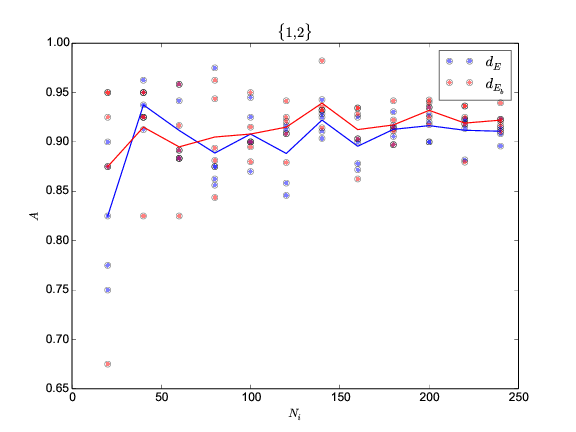

In [2]:
WImage(filename="../figs/clustering_binary_12.pdf")

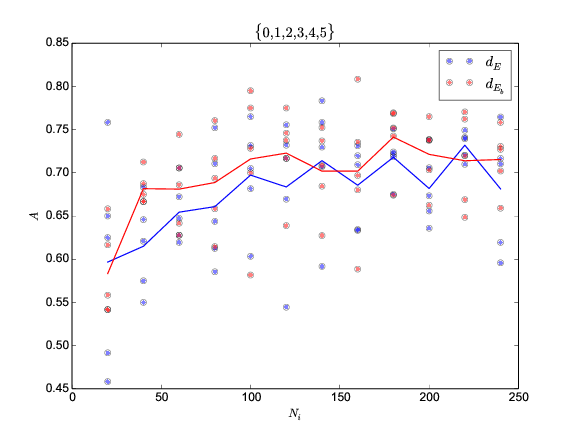

In [4]:
WImage(filename="../figs/clustering_binary_012345.pdf")

## Shape to Image

We extract the shape from original image, then write back a binary image. This will be used after Procrustes alignment.

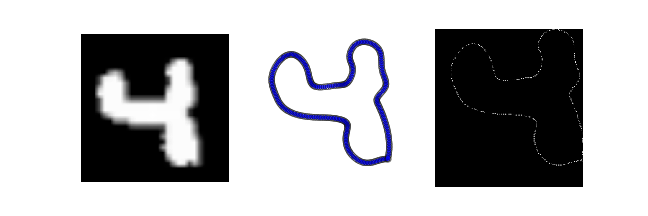

In [3]:
WImage(filename="../figs/shape_image_4.pdf")

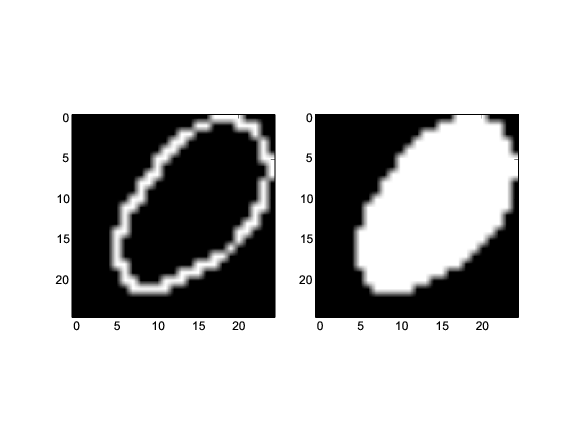

In [2]:
WImage(filename="../figs/fill_0.pdf")

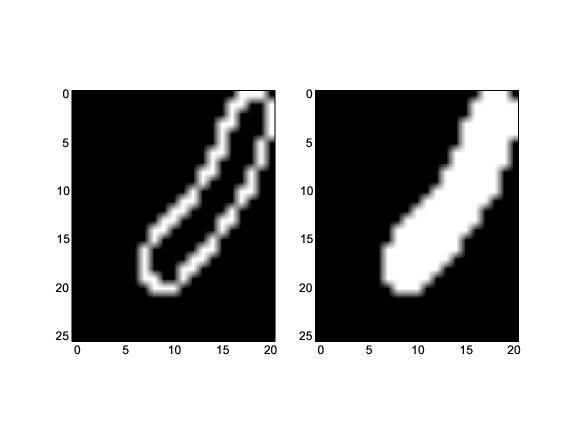

In [3]:
WImage(filename="../figs/fill_1.pdf")

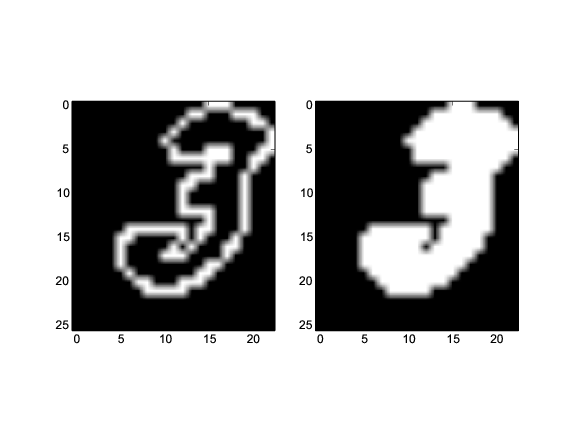

In [4]:
WImage(filename="../figs/fill_3.pdf")

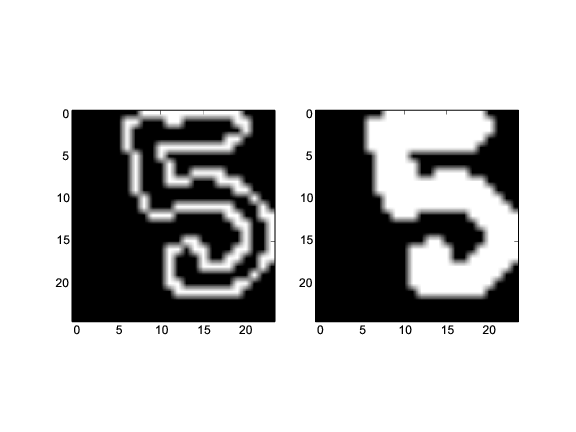

In [5]:
WImage(filename="../figs/fill_5.pdf")

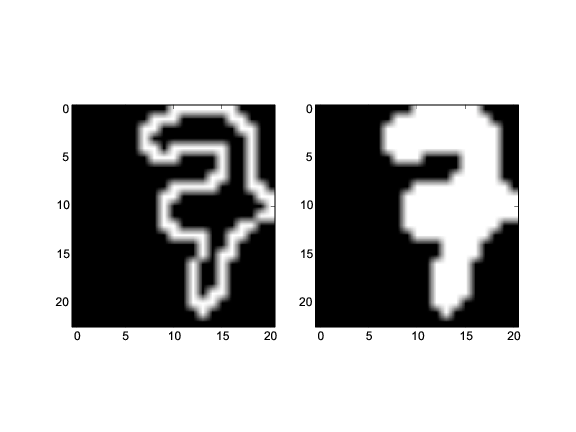

In [6]:
WImage(filename="../figs/fill_7.pdf")